# Predicting heart disease using machine learning

This notebook looks into using various Python-based maching learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not comeone has heart disease based on medical attributes

Approach: 1. Problem definition 2. Data 3. Evaluation 4. Features 5. Modelling 6. Experimentation

## 1. Problem Definitions
Given clinical presentations, can we determine if someone has heart disease or not?

## 2. Data
UCI Heart Disease Data Set from Kaggle

## 3. Evaluation
Goal: Try to get to 95% accuracy of predicting heart disease in patients

## 4. Features
**Data Dictionary**
* age: age in years
* sex: male or female (1 = male, 0 = female)
* cp: chest pain type (0 = typical, 1 = atypical, 2 = non-anginal, 3 = asymptomatic)
* trestbps: resting blood pressure on admission in mm Hg (above 130 is a problem)
* chol: serum cholesterol in mg/dL (above 200 is a problem)
* fbs: fasting blood sugar greater than 12 mg/dL (1 = true, 0 = false)
* restecg: resting electrocardiographic results (0 = nothing, 1 = ST-T Wave abnormality, 2 = left ventricular hypertrophy)
* thalach: max heart rate in beats per second
* exang: exercise induced angina (1 = yes, 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment (0 = upsloping, 1 = flatsloping, 2 = downsloping)
* ca: number of major vessels (0-3) colored by fluoroscopy. The more the better
* thal: thallium stress result (3 = normal, 6 = fixed defect, 7 = reversible defect)
* target: (1 = has heart disease, 0 = does not have heart disease)

## Load Libraries

In [5]:
# Exploratory Data Analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear in the notebook
%matplotlib inline

# ML Models from sckikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# ML Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

## Load Data

In [10]:
df = pd.read_csv("heart-disease-classification-practice.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types of data?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

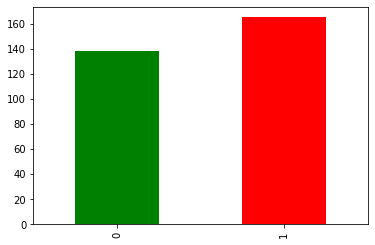

In [13]:
## How many people in our data set even have heart disease? 1 = yes, 0 = no
df.target.value_counts().plot(kind = "bar", color = ["red", "green"]);

In [14]:
# What other kinds of data do we have in our set?
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency based on Sex and compare with the target

In [18]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [19]:
pd.crosstab(df.target, df.sex)

'''
72 of the 96 women in our data set have heart disease = 75%
93 of the 207 men in our data set have heart disease = 45%

Our data set is probably not representative of the population as a whole
'''

sex,0,1
target,,
0,24,114
1,72,93


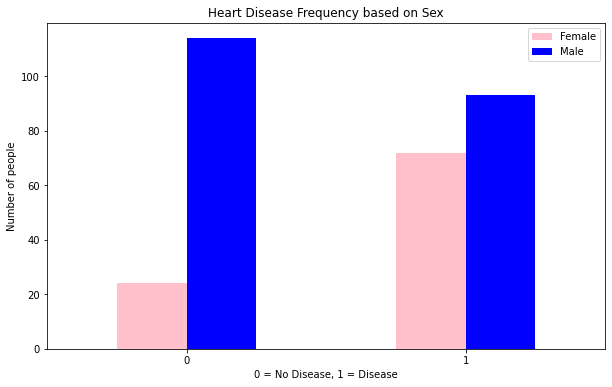

In [24]:
# Visualization of our crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize = (10,6), color = ["pink", "blue"]);

# Let's format our graph a bit
plt.title("Heart Disease Frequency based on Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Number of people")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0); # Make the numbers on the bottom vertical instead of horizontal